# Исследование надежности заемщиков

Кредитный отдел банка желает узнать, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов. 

<b><u>Цель:</u></b> Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

<b><u>Задача:</u></b>

Исследовать данные и ответить на вопросы
1.	Есть ли зависимость между количеством детей и возвратом кредита в срок?
2.	Есть ли зависимость между семейным положением и возвратом кредита в срок?
3.	Есть ли зависимость между уровнем дохода и возвратом кредита в срок?
4.	Как разные цели кредита влияют на его возврат в срок?
5.	Приведите возможные причины появления пропусков в исходных данных.
6.	Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

In [42]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [43]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [45]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [46]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Обработка аномальных значений

In [48]:
data['days_employed'] = data['days_employed'].abs()

In [49]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

In [50]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [51]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [52]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

In [53]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [54]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [55]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [56]:
data['education'] = data['education'].str.lower()

In [15]:
data.duplicated().sum()

71

In [57]:
data = data.drop_duplicates()

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21331 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21331 non-null  int64  
 1   days_employed     21331 non-null  float64
 2   dob_years         21331 non-null  int64  
 3   education         21331 non-null  object 
 4   education_id      21331 non-null  int64  
 5   family_status     21331 non-null  object 
 6   family_status_id  21331 non-null  int64  
 7   gender            21331 non-null  object 
 8   income_type       21331 non-null  object 
 9   debt              21331 non-null  int64  
 10  total_income      21331 non-null  int64  
 11  purpose           21331 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


### Категоризация данных

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данных

### Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
data.head(3)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью


In [23]:
# за возврат кредита в срок видиом отвечает колонка 'debt' 
# 0 - возврат в срок
# 1 - невозврат в срок

data['debt'].unique()

array([0, 1])

In [24]:
# сформируем таблицу со значениями количества строк в каждой группе с определенным количеством детей
# и соответсвующей им доли невозвратов в срок 

children_debt_share = data.groupby(['children'], as_index=False)['children'].count()
children_debt_share['debt_share'] = round((data.groupby('children')['debt'].mean()), 3)
children_debt_share

,children,debt_share
0,14091,0.075
1,4808,0.092
2,2052,0.095
3,330,0.082
4,41,0.098
5,9,0.000


In [25]:
children_debt_share_02 = data.groupby('children').agg({'debt': ['count', 'sum']})
children_debt_share_02['debt_share'] = children_debt_share_02['debt']['sum'] / children_debt_share_02['debt']['count']
children_debt_share_02

debt       debt_share
          count   sum           
children                        
0         14091  1063   0.075438
1          4808   444   0.092346
2          2052   194   0.094542
3           330    27   0.081818
4            41     4   0.097561
5             9     0   0.000000

In [26]:
children_debt_share_02.shape[0]

6

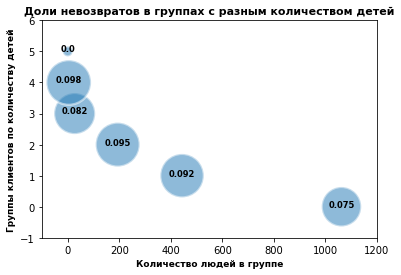

In [27]:
# график представления зависимости между количеством детей и возвратом кредита в срок

import seaborn as sns
import matplotlib.pyplot as plt
grahp_bubble = sns.scatterplot(x= children_debt_share_02['debt']['sum'],
                     y= children_debt_share_02.index,
                     size=children_debt_share_02['debt_share'],
                     alpha=0.5, legend=False, sizes=(100, 2000),
                     palette="Paired")

plt.ylim(-1, 6)
plt.xlim(-100, 1200)
plt.title("Доли невозвратов в группах с разным количеством детей",fontsize=11,fontweight='semibold')
plt.xlabel("Количество людей в группе",fontsize=9,fontweight='semibold')
plt.ylabel("Группы клиентов по количеству детей",fontsize=9,fontweight='semibold')
for i in range(0,children_debt_share_02.shape[0]):
    grahp_bubble.text(children_debt_share_02['debt']['sum'][i],
                   children_debt_share_02.index[i],
                round(children_debt_share_02['debt_share'][i],3),
           horizontalalignment='center', color='black', size='small', weight='semibold')

<b>**Вывод:** </b>
    
Доля невозвратов меньше всего в группе с 5 детьми детей, а самое большее в группе с 4 детьми. Однако общее количество клиентов в группах с 5, 4 и 3 детьми существенно ниже остальных групп. Делать однозначные выводы в такой ситуации не совсем корректно. Есть неболоьшая тендеции в снижении процента невозврата в группе клиентов без детей.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [28]:
# посмотрим на уникальные значения колонки 'family_status'
data['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [29]:
f_status_grouped_debt_share = data.groupby('family_status').agg({'debt': ['count', 'sum']})
f_status_grouped_debt_share['debt_share'] = f_status_grouped_debt_share['debt']['sum'] / f_status_grouped_debt_share['debt']['count']
f_status_grouped_debt_share

debt      debt_share
                       count  sum           
family_status                               
Не женат / не замужем   2796  273   0.097639
в разводе               1189   84   0.070648
вдовец / вдова           951   63   0.066246
гражданский брак        4134  385   0.093130
женат / замужем        12261  927   0.075606

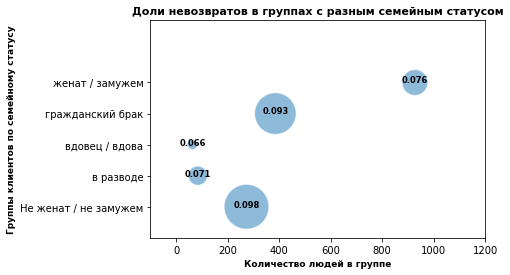

In [30]:
# график представления зависимости между семейным положением и возвратом кредита в срок

grahp_bubble = sns.scatterplot(x= f_status_grouped_debt_share['debt']['sum'],
                     y= f_status_grouped_debt_share.index,
                     size=f_status_grouped_debt_share['debt_share'],
                     alpha=0.5, legend=False, sizes=(100, 2000),
                     palette="Paired")

plt.ylim(-1, 6)
plt.xlim(-100, 1200)
plt.title("Доли невозвратов в группах с разным семейным статусом",fontsize=11,fontweight='semibold')
plt.xlabel("Количество людей в группе",fontsize=9,fontweight='semibold')
plt.ylabel("Группы клиентов по семейному статусу",fontsize=9,fontweight='semibold')
for i in range(0,f_status_grouped_debt_share.shape[0]):
    grahp_bubble.text(f_status_grouped_debt_share['debt']['sum'][i],
                   f_status_grouped_debt_share.index[i],
                round(f_status_grouped_debt_share['debt_share'][i],3),
           horizontalalignment='center', color='black', size='small', weight='semibold')

<b>**Вывод:** </b>
    
Доля невозвратов меньше всего в группах со статусом вдовец/вдова и в разводе, однако общее количество клиентов в этих группах  существенно ниже остальных. Делать однозначные выводы в такой ситуации не совсем корректно. Есть неболоьшая тендеции в снижении процента невозврата в группе клиентов женат/замужем.

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [31]:
income_cat_grouped_debt_share = data.groupby(['total_income_category']).agg({'debt': ['count', 'sum']})
income_cat_grouped_debt_share['debt_share'] = income_cat_grouped_debt_share['debt']['sum'] / income_cat_grouped_debt_share['debt']['count']
income_cat_grouped_debt_share

debt       debt_share
                       count   sum           
total_income_category                        
A                         25     2   0.080000
B                       5014   354   0.070602
C                      15921  1353   0.084982
D                        349    21   0.060172
E                         22     2   0.090909

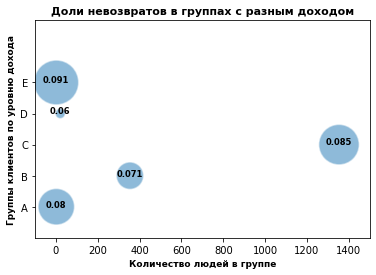

In [32]:
# график представления зависимости между уровнем дохода и возвратом кредита в срок

grahp_bubble = sns.scatterplot(x= income_cat_grouped_debt_share['debt']['sum'],
                     y= income_cat_grouped_debt_share.index,
                     size=income_cat_grouped_debt_share['debt_share'],
                     alpha=0.5, legend=False, sizes=(100, 2000),
                     palette="Paired")

plt.ylim(-1, 6)
plt.xlim(-100, 1500)
plt.title("Доли невозвратов в группах с разным доходом",fontsize=11,fontweight='semibold')
plt.xlabel("Количество людей в группе",fontsize=9,fontweight='semibold')
plt.ylabel("Группы клиентов по уровню дохода",fontsize=9,fontweight='semibold')
for i in range(0,income_cat_grouped_debt_share.shape[0]):
    grahp_bubble.text(income_cat_grouped_debt_share['debt']['sum'][i],
                   income_cat_grouped_debt_share.index[i],
                round(income_cat_grouped_debt_share['debt_share'][i],3),
           horizontalalignment='center', color='black', size='small', weight='semibold')

<b>**Вывод:** </b>
    
Количество клиентов с очнь низкими, низкими и высокими доходами незначительно, поэтому делать выводы об этих группах не корректно. Группа клиентов с доходами выше среднего реже невозвращает кредит в срок в сравнении со средним доходом.

### Как разные цели кредита влияют на его возврат в срок?

In [33]:
purpose_cat_grouped_debt_share = data.groupby(['purpose_category']).agg({'debt': ['count', 'sum']})
purpose_cat_grouped_debt_share['debt_share'] = purpose_cat_grouped_debt_share['debt']['sum'] / purpose_cat_grouped_debt_share['debt']['count']
purpose_cat_grouped_debt_share

debt      debt_share
                          count  sum           
purpose_category                               
операции с автомобилем     4279  400   0.093480
операции с недвижимостью  10751  780   0.072551
получение образования      3988  369   0.092528
проведение свадьбы         2313  183   0.079118

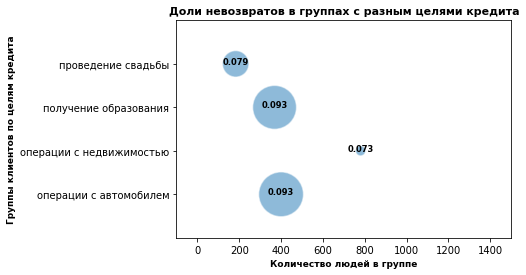

In [59]:
# график представления зависимости целью кредита и возвратом кредита в срок

grahp_bubble = sns.scatterplot(x= purpose_cat_grouped_debt_share['debt']['sum'],
                     y= purpose_cat_grouped_debt_share.index,
                     size=purpose_cat_grouped_debt_share['debt_share'],
                     alpha=0.5, legend=False, sizes=(100, 2000),
                     palette="Paired")

plt.ylim(-1, 4)
plt.xlim(-100, 1500)
plt.title("Доли невозвратов в группах с разным целями кредита",fontsize=11,fontweight='semibold')
plt.xlabel("Количество людей в группе",fontsize=9,fontweight='semibold')
plt.ylabel("Группы клиентов по целям кредита",fontsize=9,fontweight='semibold')
for i in range(0,purpose_cat_grouped_debt_share.shape[0]):
    grahp_bubble.text(purpose_cat_grouped_debt_share['debt']['sum'][i],
                   purpose_cat_grouped_debt_share.index[i],
                round(purpose_cat_grouped_debt_share['debt_share'][i],3),
           horizontalalignment='center', color='black', size='small', weight='semibold')

<b>**Вывод:** </b>
    
Доля невозвратов меньше всего в группе операций с недвижимостью.

### Приведите возможные причины появления пропусков в исходных данных.

- ошибки при вводе данных
- отсутствующая или неполная информация
- проблемы конфиденциальности или безопасности данных
- отсутствие доступа к определенным источникам данных
- изменения или обновления в системах хранения или управления данными

### Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

В отличие от среднего значения, которое чувствительно к выбросам, на медиану меньше влияют экстремальные значения, и она обеспечивает более репрезентативную меру типичного значения. Заполнение пропусков медианой полезно в ситуациях, когда данные имеют неравномерное(скошенное) распределение и среднее значение не обеспечивает точное представление центральной тенденции. Кроме того, на медиану меньше влияют отсутствующие данные.

## Общий вывод.

От банка был получен датасет содержащий статистику о платежеспособности клиентов. Поставлена задача разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Результаты предварительного анализа будут учтены при построении модели кредитного скоринга, который будет оценивает способность потенциального заёмщика вернуть кредит банку.

Датасет содержит `21525 строк` и `12 колонок`.

<b>Проверка данных на дубли, пропуски и аномальные значения.</b>
    
Пропущенные данные `2174` в колонке `total_income` были заполнены медианными значениями для групп по типу дохода, и переведены в целочисленный вид.

Пропущенные данные `2174` в колонке `days_employed` были заполнены медианными значениями для групп по типу дохода. В данных `days_employed` были обнаружены отрицательные значения, которые были исправлены. Также у безработных и пенсионеров в этой категории обнаружены аномально большие значения, они оставлены без изменений.

Были исправлены отрицательные значения данных в колонке `children`

Неявные дубликаты в колонке `education` были обнаружены при переводе данных в нижний регистр. 

Полные дубликаты в датасете составили `71`. Они были удалены. Итоговый датасет составил `21331` строчки.

<b>Категоризация данных.</b>

Данные категории `total_income` были распределены на 5 уровней: 
- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.  

Данные категории 'purpose' были распределены на 4 категории: 
- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

<b>Предварительный анализ данных с целью выявления зависимости между возвратом кредита в срок и другими данными клиентов.</b> 

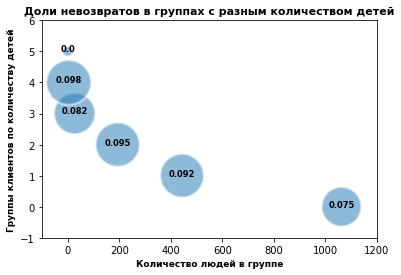 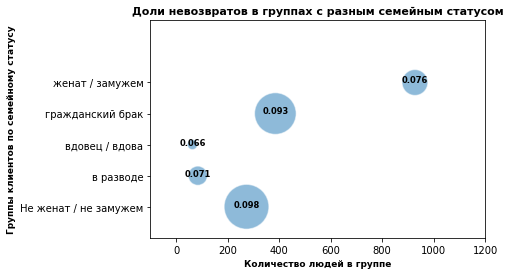 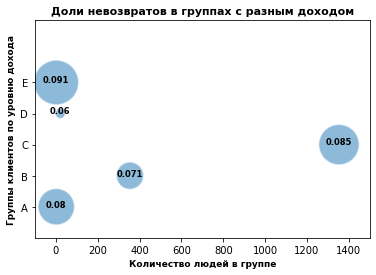 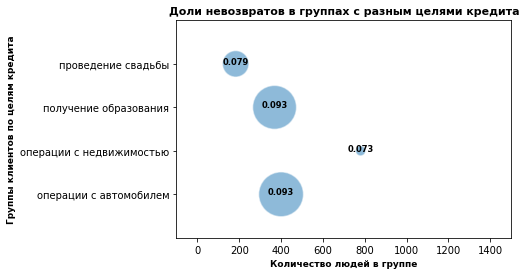


Выводы о категориях с самыми низким показателями невозврата:
    
- клиенты без детей
- клиенты замужем/женаты
- клиенты с доходом выше среднего
- клиенты, берущие кредит на операции с недвижимостью

